# Anàlisi de Dades sobre Soroll a Barcelona

Aquest notebook serveix per a l'anàlisi de dades sobre l'exposició al soroll a Barcelona. Les dades provenen d'un fitxer CSV i contenen les següents columnes:

- **Codi_Districte**: Codi del districte.
- **Nom_Districte**: Nom del districte.
- **Codi_Barri**: Codi del barri.
- **Nom_Barri**: Nom del barri.
- **Rang_soroll**: Rang de soroll.
- **TOTAL_D**: Població total exposada al soroll durant el dia.
- **TOTAL_E**: Població total exposada al soroll durant la tarda.
- **TOTAL_N**: Població total exposada al soroll durant la nit.
- **TOTAL_DEN**: Població total exposada al soroll ponderada per dia-tarda-nit (Lden).
- **TRANSIT_D**: Població exposada al soroll del trànsit durant el dia.
- **TRANSIT_E**: Població exposada al soroll del trànsit durant la tarda.
- **TRANSIT_N**: Població exposada al soroll del trànsit durant la nit.
- **TRANSIT_DEN**: Població exposada al soroll del trànsit ponderada per dia-tarda-nit (Lden).
- **GI_TR_D**: Població exposada al soroll de les activitats industrials i comercials durant el dia.
- **GI_TR_E**: Població exposada al soroll de les activitats industrials i comercials durant la tarda.
- **GI_TR_N**: Població exposada al soroll de les activitats industrials i comercials durant la nit.
- **GI_TR_DEN**: Població exposada al soroll de les activitats industrials i comercials ponderada per dia-tarda-nit (Lden).
- **FFCC_D**: Població exposada al soroll del ferrocarril durant el dia.
- **FFCC_E**: Població exposada al soroll del ferrocarril durant la tarda.
- **FFCC_N**: Població exposada al soroll del ferrocarril durant la nit.
- **FFCC_DEN**: Població exposada al soroll del ferrocarril ponderada per dia-tarda-nit (Lden).
- **INDUST_D**: Població exposada al soroll de les activitats industrials durant el dia.
- **INDUST_E**: Població exposada al soroll de les activitats industrials durant la tarda.
- **INDUST_N**: Població exposada al soroll de les activitats industrials durant la nit.
- **INDUST_DEN**: Població exposada al soroll de les activitats industrials ponderada per dia-tarda-nit (Lden).
- **VIANANTS_D**: Població exposada al soroll dels vianants durant el dia.
- **VIANANTS_E**: Població exposada al soroll dels vianants durant la tarda.
- **OCI_N**: Població exposada als nivells d'oci nocturn en cap de setmana (divendres i dissabte) entre les 23:00 i les 7:00 hores.
- **PATIS_D**: Superfície de patis escolars que superen els nivells límit d'exposició diària.
- **PATIS_E**: Superfície de patis escolars que superen els nivells límit d'exposició vespertina.
- **PARCS_D**: Superfície de parcs que superen els nivells límit d'exposició diària.

Anem a carregar les dades per començar l'anàlisi.


In [24]:
# Importem la llibreria Pandas
import pandas as pd

# Carreguem les dades en un DataFrame de Pandas
lloger_df = pd.read_csv('2023_lloguer_preu_trim.csv')
soroll_df = df = pd.read_csv('2017_poblacio_exposada_ciutat_mapa_estrategic_soroll_bcn_long.csv', delimiter=',', quotechar='"')


# Mostrem les primeres files del DataFrame per entendre la seva estructura
soroll_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Codi_Districte  730 non-null    int64 
 1   Nom_Districte   730 non-null    object
 2   Codi_Barri      730 non-null    int64 
 3   Nom_Barri       730 non-null    object
 4   Rang_soroll     730 non-null    object
 5   TOTAL_D         730 non-null    object
 6   TOTAL_E         730 non-null    object
 7   TOTAL_N         730 non-null    object
 8   TOTAL_DEN       730 non-null    object
 9   TRANSIT_D       730 non-null    object
 10  TRANSIT_E       730 non-null    object
 11  TRANSIT_N       730 non-null    object
 12  TRANSIT_DEN     730 non-null    object
 13  GI_TR_D         730 non-null    object
 14  GI_TR_E         730 non-null    object
 15  GI_TR_N         730 non-null    object
 16  GI_TR_DEN       730 non-null    object
 17  FFCC_D          730 non-null    object
 18  FFCC_E    

In [25]:
# Carregar les dades
df_lloguer = pd.read_csv("2023_lloguer_preu_trim.csv")

# Filtrar els registres que contenen les dades del lloguer mitjà mensual i per superfície
df_lloguer_mitja_mensual = df_lloguer[df_lloguer['Lloguer_mitja'] == "Lloguer mitjà mensual (Euros/mes)"]
df_lloguer_mitja_superficie = df_lloguer[df_lloguer['Lloguer_mitja'] == "Lloguer mitjà per superfície (Euros/m2 mes)"]

# Calcular la mitjana del lloguer mitjà mensual i per superfície per a cada barri, mantenint les altres columnes
df_mitja_mensual = df_lloguer_mitja_mensual.groupby(['Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja'])['Preu'].mean().reset_index()
df_mitja_superficie = df_lloguer_mitja_superficie.groupby(['Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja'])['Preu'].mean().reset_index()

# Unir les dues taules de mitjanes en una sola, amb sufixos per a les columnes de preu
df_mitja_final = pd.merge(df_mitja_mensual, df_mitja_superficie, on=['Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri'], suffixes=('_Mensual', '_Superficie'))

# Guardar el nou DataFrame
#df_mitja_final.to_csv("2023_lloguer_preu_mitja.csv", index=False)

# Calcular la superfície mitjana per barri
df_mitja_final['Superficie_Mitja'] = df_mitja_final['Preu_Mensual'] / df_mitja_final['Preu_Superficie']





In [26]:
# Mantenir només les columnes necessàries
df_mitja_final = df_mitja_final[['Nom_Districte', 'Nom_Barri', 'Preu_Mensual', 'Preu_Superficie', 'Superficie_Mitja']]
df_mitja_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nom_Districte     73 non-null     object 
 1   Nom_Barri         73 non-null     object 
 2   Preu_Mensual      69 non-null     float64
 3   Preu_Superficie   69 non-null     float64
 4   Superficie_Mitja  69 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.4+ KB


In [27]:
# llista de columnas que contenen porcentatjes
columnas_porcentatge = ['TOTAL_D', 'TOTAL_E', 'TOTAL_N', 'TOTAL_DEN', 'TRANSIT_D', 'TRANSIT_E', 'TRANSIT_N', 'TRANSIT_DEN',
                       'GI_TR_D','GI_TR_E',	'GI_TR_N',	'GI_TR_DEN',	'FFCC_D','FFCC_E','FFCC_N',	'FFCC_DEN',	'INDUST_D',
                       'INDUST_E',	'INDUST_N',	'INDUST_DEN',	'VIANANTS_D','VIANANTS_E',	'OCI_N',	'PATIS_D',	'PATIS_E','PARCS_D' ]

# Eliminar el signe del percentatje y convertir a float
for columna in columnas_porcentatge:
    soroll_df[columna] = soroll_df[columna].str.rstrip('%').astype('float')   


In [28]:
soroll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Codi_Districte  730 non-null    int64  
 1   Nom_Districte   730 non-null    object 
 2   Codi_Barri      730 non-null    int64  
 3   Nom_Barri       730 non-null    object 
 4   Rang_soroll     730 non-null    object 
 5   TOTAL_D         730 non-null    float64
 6   TOTAL_E         730 non-null    float64
 7   TOTAL_N         730 non-null    float64
 8   TOTAL_DEN       730 non-null    float64
 9   TRANSIT_D       730 non-null    float64
 10  TRANSIT_E       730 non-null    float64
 11  TRANSIT_N       730 non-null    float64
 12  TRANSIT_DEN     730 non-null    float64
 13  GI_TR_D         730 non-null    float64
 14  GI_TR_E         730 non-null    float64
 15  GI_TR_N         730 non-null    float64
 16  GI_TR_DEN       730 non-null    float64
 17  FFCC_D          730 non-null    flo

In [29]:
# Eliminar la columna 'Nom_Districte' en df_mitja_final
df_mitja_final.drop(columns=['Nom_Districte'], inplace=True)

# Realitzar la unió dels DataFrames utilitzan 'Nom_Barri' com clau
df_unificat = pd.merge(df_mitja_final, soroll_df, on='Nom_Barri', how='inner')

# Ara df_unificat conté la informació combinada d'ambdós DataFrames, sense columnes duplicades ni sufixos




In [30]:

columnas_ordenadas = ['Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 
                      'Preu_Mensual', 'Preu_Superficie', 'Superficie_Mitja',
                      'Rang_soroll', 'TOTAL_D', 'TOTAL_E', 'TOTAL_N', 'TOTAL_DEN', 
                      'TRANSIT_D', 'TRANSIT_E', 'TRANSIT_N', 'TRANSIT_DEN', 
                      'GI_TR_D', 'GI_TR_E', 'GI_TR_N', 'GI_TR_DEN', 
                      'FFCC_D', 'FFCC_E', 'FFCC_N', 'FFCC_DEN', 
                      'INDUST_D', 'INDUST_E', 'INDUST_N', 'INDUST_DEN', 
                      'VIANANTS_D', 'VIANANTS_E', 'OCI_N', 
                      'PATIS_D', 'PATIS_E', 'PARCS_D']


df_unificat = df_unificat[columnas_ordenadas]
df_unificat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Codi_Districte    730 non-null    int64  
 1   Nom_Districte     730 non-null    object 
 2   Codi_Barri        730 non-null    int64  
 3   Nom_Barri         730 non-null    object 
 4   Preu_Mensual      690 non-null    float64
 5   Preu_Superficie   690 non-null    float64
 6   Superficie_Mitja  690 non-null    float64
 7   Rang_soroll       730 non-null    object 
 8   TOTAL_D           730 non-null    float64
 9   TOTAL_E           730 non-null    float64
 10  TOTAL_N           730 non-null    float64
 11  TOTAL_DEN         730 non-null    float64
 12  TRANSIT_D         730 non-null    float64
 13  TRANSIT_E         730 non-null    float64
 14  TRANSIT_N         730 non-null    float64
 15  TRANSIT_DEN       730 non-null    float64
 16  GI_TR_D           730 non-null    float64
 1

In [31]:
df_unificat

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_Mensual,Preu_Superficie,Superficie_Mitja,Rang_soroll,TOTAL_D,TOTAL_E,...,INDUST_D,INDUST_E,INDUST_N,INDUST_DEN,VIANANTS_D,VIANANTS_E,OCI_N,PATIS_D,PATIS_E,PARCS_D
0,1,Ciutat Vella,1,el Raval,926.10,15.55,59.556270,<40 dB,7.73,21.45,...,100.0,100.0,100.0,100.0,57.69,59.13,75.89,95.90,98.00,100.0
1,1,Ciutat Vella,1,el Raval,926.10,15.55,59.556270,40-45 dB,26.98,19.18,...,0.0,0.0,0.0,0.0,13.35,16.80,4.97,0.00,0.00,0.0
2,1,Ciutat Vella,1,el Raval,926.10,15.55,59.556270,45-50 dB,7.38,5.68,...,0.0,0.0,0.0,0.0,10.90,9.04,2.53,0.00,0.00,0.0
3,1,Ciutat Vella,1,el Raval,926.10,15.55,59.556270,50-55 dB,11.97,13.28,...,0.0,0.0,0.0,0.0,10.81,8.03,1.80,1.65,0.00,0.0
4,1,Ciutat Vella,1,el Raval,926.10,15.55,59.556270,55-60 dB,19.85,19.74,...,0.0,0.0,0.0,0.0,6.47,6.02,5.79,1.56,1.11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10,Sant Martí,73,la Verneda i la Pau,1069.75,16.40,65.228659,60-65 dB,22.70,20.41,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
726,10,Sant Martí,73,la Verneda i la Pau,1069.75,16.40,65.228659,65-70 dB,7.34,6.41,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
727,10,Sant Martí,73,la Verneda i la Pau,1069.75,16.40,65.228659,70-75 dB,3.31,0.20,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
728,10,Sant Martí,73,la Verneda i la Pau,1069.75,16.40,65.228659,75-80 dB,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0


 Volem comprendre l'impacte del soroll als diferents barris de Barcelona, especialment els nivells de soroll que podrien ser considerats "molestos" per als residents.

Definició de "Soroll Molest":
Primer, necessitem definir què és "soroll molest". Basant-nos en estudis i normatives, hem determinat que qualsevol soroll superior a 60 decibels (dB) pot ser considerat molest per a la majoria de les persones.

Selecció de Dades Rellevants:
Amb aquesta definició a la mà, hem filtrat les nostres dades per centrar-nos només en els nivells de soroll per sobre d'aquest llindar. Això ens permet descartar nivells de soroll que, encara que presents, no són prou alts com per ser una preocupació significativa.

Agrupació per Barri:
Barcelona està dividida en diversos barris, i volem entendre l'impacte del soroll en cadascun d'ells. Per això, sumem els percentatges de població exposada a sorolls molestos a cada barri. Això ens dóna una idea clara de quins barris estan més afectats.

Consolidació de la Informació:
Un cop tenim els percentatges d'exposició al soroll per barri, els combinem amb altres dades rellevants de cada barri, com el seu nom, codi i altres detalls. Això ens dóna un panorama complet i ens permet realitzar anàlisis més detallats en el futur.

Per què aquest enfocament?
Centrant-nos només en nivells de soroll "molestos", podem identificar i prioritzar àrees d'intervenció. Els barris amb una alta exposició a aquests nivells de soroll poden necessitar mesures de mitigació o campanyes de sensibilització. A més, al tenir un panorama clar de la situació a cada barri, la presa de decisions basada en dades es torna més efectiva i precisa.

In [32]:
# 1. Definir un diccionario para mapear las categorías de decibelios a un valor booleano
mapeo_dB = { '<40 dB': False, '40-45 dB': False, '45-50 dB': False, '50-55 dB': False, '55-60 dB': False, 
             '60-65 dB': True, '65-70 dB': True, '70-75 dB': True, '75-80 dB': True, '>=80 dB': True }

# 2. Utilizar el diccionario para filtrar los registros en df_unificat
df_filtrat = df_unificat[df_unificat['Rang_soroll'].map(mapeo_dB)]

# 3. Agrupar por 'Nom_Barri' y sumar sólo las columnas de porcentaje
columnas_percentatge = ['TOTAL_D', 'TOTAL_E', 'TOTAL_N', 'TOTAL_DEN', 'TRANSIT_D', 'TRANSIT_E', 'TRANSIT_N', 'TRANSIT_DEN',
                        'GI_TR_D','GI_TR_E', 'GI_TR_N', 'GI_TR_DEN', 'FFCC_D','FFCC_E','FFCC_N', 'FFCC_DEN', 'INDUST_D',
                        'INDUST_E', 'INDUST_N', 'INDUST_DEN', 'VIANANTS_D','VIANANTS_E', 'OCI_N', 'PATIS_D', 'PATIS_E','PARCS_D']

df_agrupat = df_filtrat.groupby(['Nom_Barri', 'Nom_Districte', 'Codi_Districte', 'Codi_Barri'])[columnas_percentatge].sum().reset_index()

# 4. Eliminar la columna 'Rang_soroll' del DataFrame original y quedarnos con un registro único por barrio
df_sin_rang_soroll = df_unificat.drop(columns=['Rang_soroll', *columnas_percentatge]).drop_duplicates()

# 5. Unimos este DataFrame con df_agrupat para tener un solo registro por barrio
df_final = pd.merge(df_sin_rang_soroll, df_agrupat, on=['Nom_Barri', 'Nom_Districte', 'Codi_Districte', 'Codi_Barri'])



df_final

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_Mensual,Preu_Superficie,Superficie_Mitja,TOTAL_D,TOTAL_E,TOTAL_N,...,INDUST_D,INDUST_E,INDUST_N,INDUST_DEN,VIANANTS_D,VIANANTS_E,OCI_N,PATIS_D,PATIS_E,PARCS_D
0,1,Ciutat Vella,1,el Raval,926.10,15.55,59.556270,26.09,20.67,14.93,...,0.0,0.0,0.0,0.0,0.78,0.98,9.02,0.89,0.89,0.0
1,1,Ciutat Vella,2,el Barri Gòtic,1286.70,16.60,77.512048,24.56,19.37,14.99,...,0.0,0.0,0.0,0.0,2.01,1.73,9.98,1.43,1.43,0.0
2,1,Ciutat Vella,3,la Barceloneta,990.45,18.15,54.570248,16.88,11.31,4.37,...,0.0,0.0,0.0,0.0,0.00,0.00,0.01,0.66,0.66,0.0
3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",1086.65,17.10,63.546784,25.60,18.21,10.70,...,0.0,0.0,0.0,0.0,0.60,1.05,3.90,0.44,0.44,0.0
4,2,Eixample,5,el Fort Pienc,1170.60,15.80,74.088608,55.35,52.74,35.52,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.58,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,1444.35,19.35,74.643411,50.92,40.89,12.28,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.54,3.55,0.0
69,10,Sant Martí,70,el Besòs i el Maresme,777.25,12.10,64.235537,21.24,16.61,0.27,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
70,10,Sant Martí,71,Provençals del Poblenou,1187.35,16.35,72.620795,49.53,44.07,13.38,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.18,0.18,0.0
71,10,Sant Martí,72,Sant Martí de Provençals,943.10,13.20,71.446970,33.35,26.45,7.38,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0


In [33]:
noms_nous = {
    'TOTAL_D': 'Població_Exposició_Dia',
    'TOTAL_E': 'Població_Exposició_Tarda',
    'TOTAL_N': 'Població_Exposició_Nit',
    'TOTAL_DEN': 'Població_Exposició_Total',
    'TRANSIT_D': 'Exposició_Trànsit_Dia',
    'TRANSIT_E': 'Exposició_Trànsit_Tarda',
    'TRANSIT_N': 'Exposició_Trànsit_Nit',
    'TRANSIT_DEN': 'Exposició_Trànsit_Total',
    'GI_TR_D': 'Exposició_Ind_Com_Dia',
    'GI_TR_E': 'Exposició_Ind_Com_Tarda',
    'GI_TR_N': 'Exposició_Ind_Com_Nit',
    'GI_TR_DEN': 'Exposició_Ind_Com_Total',
    'FFCC_D': 'Exposició_Ferroviària_Dia',
    'FFCC_E': 'Exposició_Ferroviària_Tarda',
    'FFCC_N': 'Exposició_Ferroviària_Nit',
    'FFCC_DEN': 'Exposició_Ferroviària_Total',
    'INDUST_D': 'Exposició_Indústria_Dia',
    'INDUST_E': 'Exposició_Indústria_Tarda',
    'INDUST_N': 'Exposició_Indústria_Nit',
    'INDUST_DEN': 'Exposició_Indústria_Total',
    'VIANANTS_D': 'Exposició_Peatonal_Dia',
    'VIANANTS_E': 'Exposició_Peatonal_Tarda',
    'OCI_N': 'Exposició_Oci_Nit',
    'PATIS_D': 'Superfície_Patis_Exposició_Dia',
    'PATIS_E': 'Superfície_Patis_Exposició_Tarda',
    'PARCS_D': 'Superfície_Parcs_Exposició_Dia'
}

df_final.rename(columns=noms_nous, inplace=True)


In [34]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Codi_Districte                    73 non-null     int64  
 1   Nom_Districte                     73 non-null     object 
 2   Codi_Barri                        73 non-null     int64  
 3   Nom_Barri                         73 non-null     object 
 4   Preu_Mensual                      69 non-null     float64
 5   Preu_Superficie                   69 non-null     float64
 6   Superficie_Mitja                  69 non-null     float64
 7   Població_Exposició_Dia            73 non-null     float64
 8   Població_Exposició_Tarda          73 non-null     float64
 9   Població_Exposició_Nit            73 non-null     float64
 10  Població_Exposició_Total          73 non-null     float64
 11  Exposició_Trànsit_Dia             73 non-null     float64
 12  Exposició_

Anàlisi Estadístic Descriptiu
Resum General
L'anàlisi estadístic descriptiu ens ofereix una visió general de l'estructura i les característiques del nostre conjunt de dades. A continuació, es descriuen algunes de les mètriques més rellevants i el que impliquen per al nostre estudi:

Compte (Recuento)
Tenim 73 registres en la majoria de les columnes.
Algunes columnes com 'Preu_Mensual', 'Preu_Superfície' i 'Superfície_Mitjana' tenen 69 registres, la qual cosa suggereix que hi ha dades mancants en aquestes columnes.
Mitjana (Media)
El preu mensual mitjà ('Preu_Mensual') és aproximadament 1037,39 euros. Aquest valor ens dóna una idea del cost de vida mitjà als barris.
Desviació Estàndard (Desviación Estándar)
Una desviació estàndard alta en columnes com 'Preu_Mensual' i 'Preu_Superfície' indica una variabilitat significativa en els preus entre els diferents barris.
Mínim i Màxim (Mínimo y Máximo)
El rang de 'Preu_Mensual' és de 491,9 a 1814,7 euros, la qual cosa indica una variabilitat considerable en el cost de vida entre els barris més econòmics i els més cars.
Percentils (Percentiles 25%, 50%, 75%)
El 50% dels barris tenen un valor de 'Població_Exposició_Dia' de 35,55 o menys, la qual cosa podria indicar una distribució més o menys equilibrada de l'exposició al soroll.
Columnes amb Valors Zero
Algunes columnes, com 'Exposició_Indústria_Dia', 'Exposició_Indústria_Tarda', etc., tenen tots els seus valors a zero. Això suggereix que no contenen informació útil i podrien ser eliminades de l'anàlisi.
Consideracions Addicionals
És fonamental recordar que estem treballant amb diferents unitats de mesura (per exemple, decibels per al soroll, euros per als preus), la qual cosa requereix precaució en fer comparacions entre columnes.

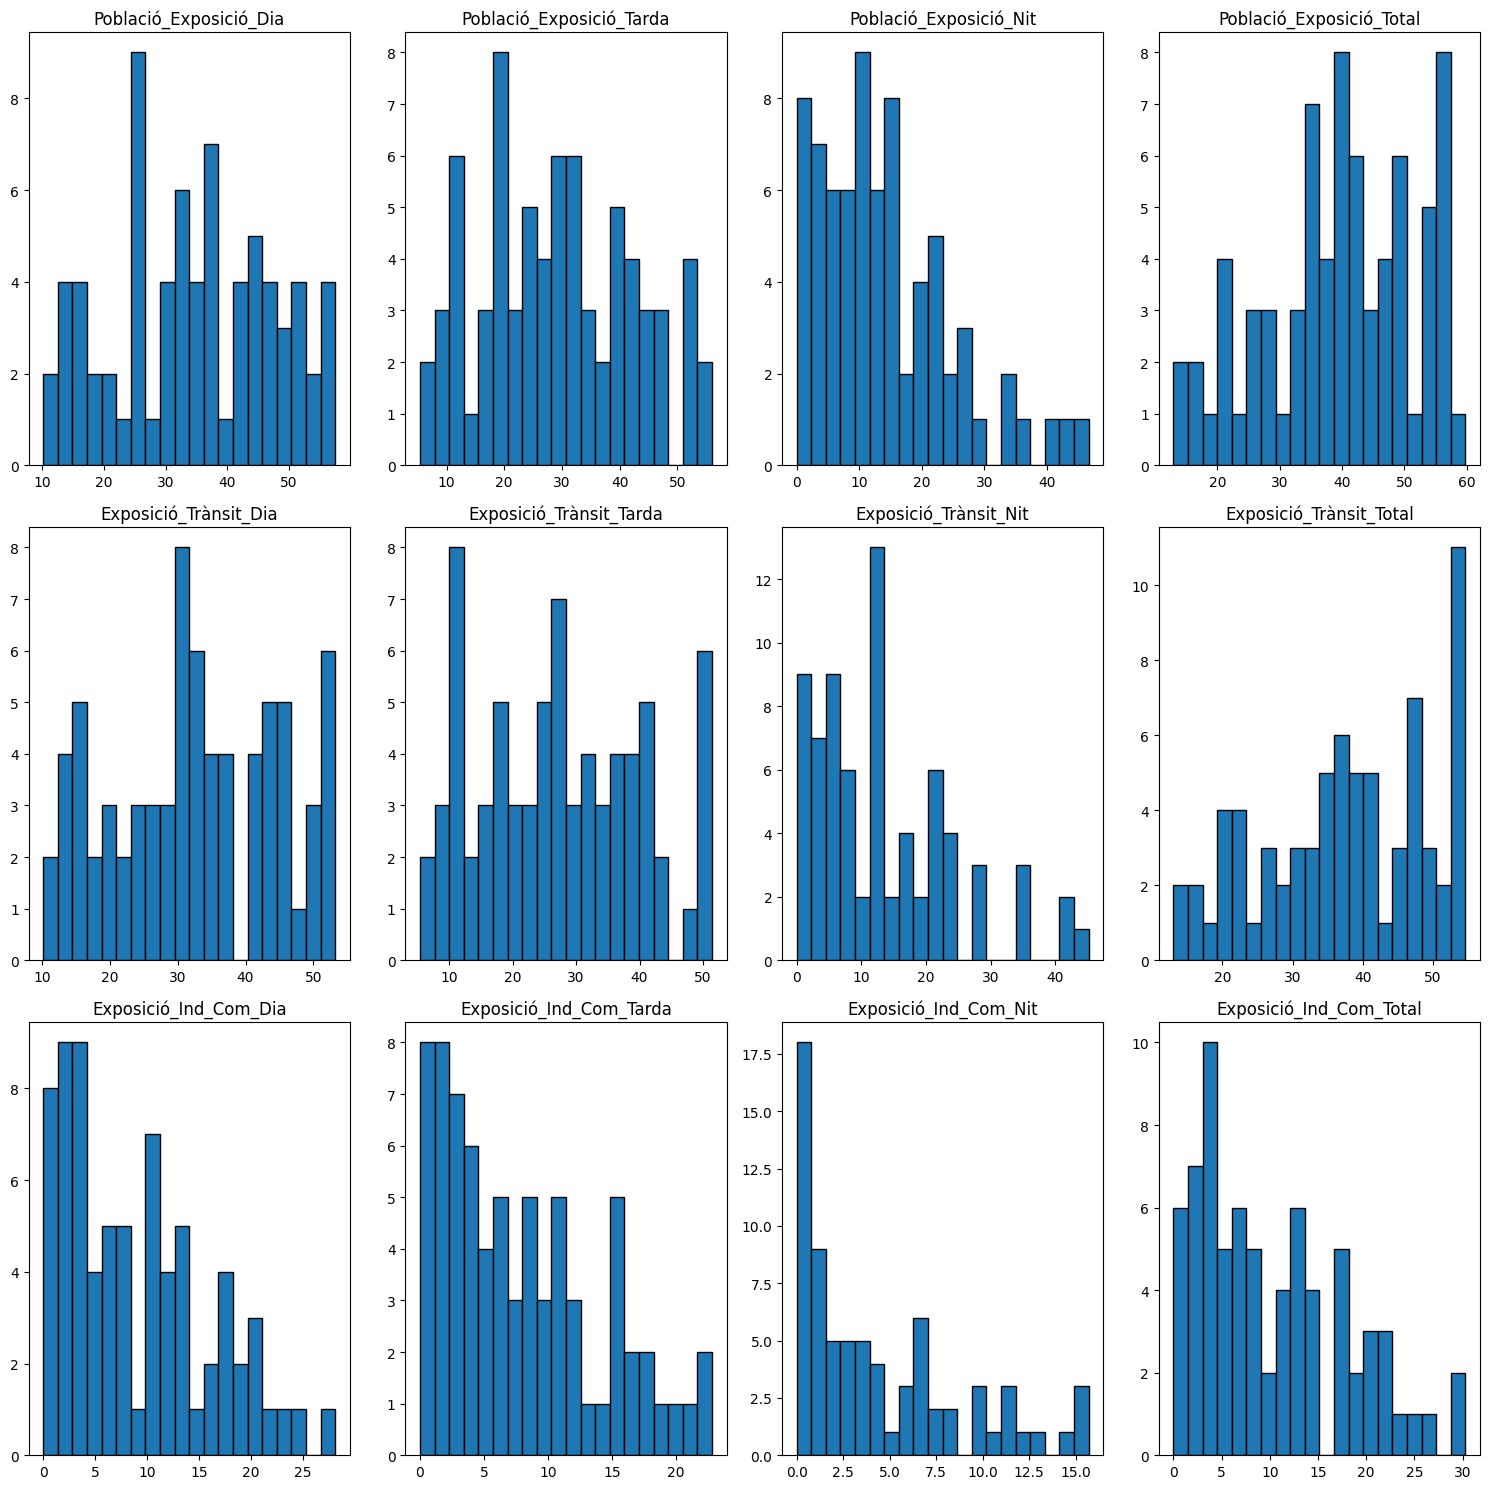

In [35]:
import matplotlib.pyplot as plt

def generar_histogramas_matplotlib(df, columnas):
    num_columnas = 4  # Número de columnas por fila
    num_filas = len(columnas) // num_columnas + (len(columnas) % num_columnas > 0)

    # Configurar el tamaño de la figura
    plt.figure(figsize=(15, 5*num_filas))

    for i, col in enumerate(columnas):
        # Crear un subplot para cada columna
        plt.subplot(num_filas, num_columnas, i+1)
        
        # Dibujar el histograma
        plt.hist(df[col], bins=20, edgecolor='black')
        
        # Establecer el título del subplot
        plt.title(col)
        plt.tight_layout()

    # Mostrar la figura completa con todos los histogramas
    plt.show()



columnas_descriptivas = [
       'Població_Exposició_Dia', 'Població_Exposició_Tarda',
       'Població_Exposició_Nit', 'Població_Exposició_Total',
       'Exposició_Trànsit_Dia', 'Exposició_Trànsit_Tarda',
       'Exposició_Trànsit_Nit', 'Exposició_Trànsit_Total',
       'Exposició_Ind_Com_Dia', 'Exposició_Ind_Com_Tarda',
       'Exposició_Ind_Com_Nit', 'Exposició_Ind_Com_Total',
       ]
generar_histogramas_matplotlib(df_final, columnas_descriptivas)






Els gràfics presenten 12 histogramas que representen l'exposició al soroll a Barcelona, organitzats en tres categories: Població, Trànsit i Indústria i Comerç. Cada categoria té desglós per hores: Dia, Tarda, Nit i Total.

1. Població:

Dia: La majoria de barris tenen entre un 20% i 40% de la seva població exposada a més de 60 dB.
Tarda: L'exposició es concentra entre el 20% i 40%, però amb una lleugera inclinació cap a una major exposició en comparació amb el dia.
Nit: L'exposició és més variada, amb alguns barris amb menys del 10% d'exposició i altres que s'apropen al 50%.
Total: L'exposició total es troba principalment entre el 20% i 40%.
2. Trànsit:

Dia: L'exposició es distribueix entre 10% i 40%, amb alguns barris tenint una menor exposició que altres.
Tarda: Hi ha una major concentració entre el 20% i 30%, encara que hi ha un barri que sobresurt amb gairebé un 50%.
Nit: L'exposició tendeix a disminuir en comparació amb altres hores, amb la majoria dels barris tenint menys del 30% d'exposició.
Total: Hi ha una àmplia variació, però la majoria de barris tenen una exposició entre 20% i 40%.
3. Indústria i Comerç:

Dia: Hi ha una major concentració de barris entre el 5% i 25% d'exposició.
Tarda: S'observa una distribució més uniforme entre 5% i 20%.
Nit: L'exposició és bastant baixa a la majoria dels barris, encara que hi ha alguns que s'apropen al 20%.
Total: L'exposició es concentra entre 5% i 25%.
En resum, sembla que durant el dia i la tarda és quan es presenta la major exposició al soroll, la qual cosa té sentit ja que és quan hi ha més activitat. El trànsit i l'activitat de la població en general són les principals fonts de soroll, mentre que la indústria i el comerç tenen un impacte menor.

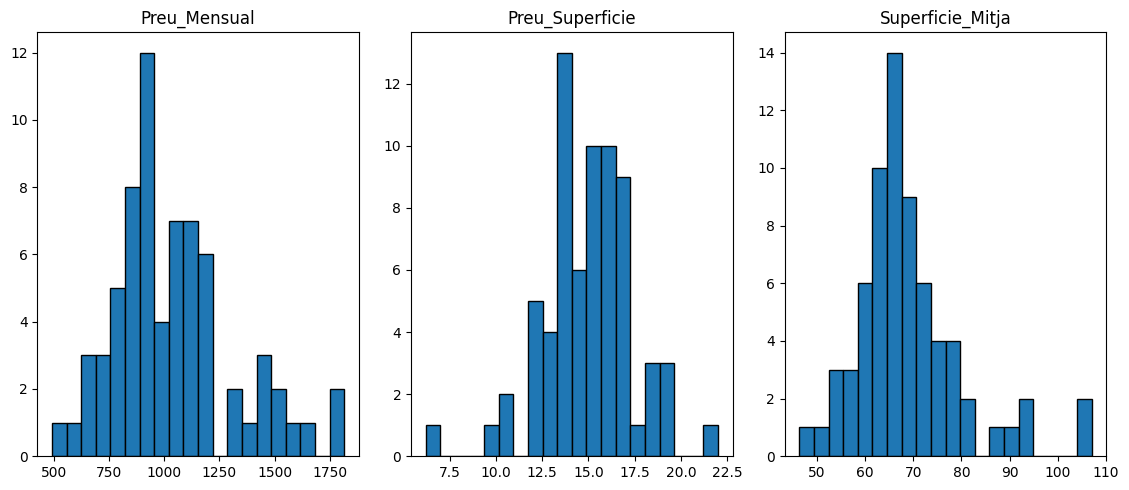

In [36]:
columnas=['Preu_Mensual', 'Preu_Superficie', 'Superficie_Mitja']
generar_histogramas_matplotlib(df_final, columnas)

1. Preu_Mensual:

La major part dels habitatges o espais es concentren en un rang de preu mensual entre 500 i 1.200 euros. Hi ha un pic notable al voltant dels 1.000 euros.
Tot i que alguns es mouen en un rang de preu més alt (1.200 a 1.500 euros), són clarament menys freqüents.
2. Preu_Superfície:

Aquest histograma mostra el preu per unitat de superfície (potser per metre quadrat). La majoria dels llocs tenen un preu per superfície que oscil·la entre 10 i 15 euros/m², amb un pic més alt al voltant dels 12-13 euros/m².
Hi ha una disminució més marcada en els espais que tenen un cost més alt per superfície, superant els 15 euros/m².
3. Superfície_Mitja:

Aquest gràfic mostra la distribució de la superfície mitjana dels espais. La majoria dels espais tenen una superfície que oscil·la entre 60 i 90 m².
Hi ha un pic pronunciat al voltant dels 75 m², indicant que aquesta podria ser la superfície més comuna o popular dels espais.
El nombre d'espais amb superfícies més grans (90 a 100 m²) és menor, i hi ha una clara disminució en la freqüència d'espais amb superfícies superiors a 100 m².

In [37]:
def afegir_total_24h(df):
    df['Població_Exposició_24h'] = df[['Població_Exposició_Dia', 'Població_Exposició_Tarda', 'Població_Exposició_Nit']].mean(axis=1)
    return df

df_final=afegir_total_24h(df_final)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Codi_Districte                    73 non-null     int64  
 1   Nom_Districte                     73 non-null     object 
 2   Codi_Barri                        73 non-null     int64  
 3   Nom_Barri                         73 non-null     object 
 4   Preu_Mensual                      69 non-null     float64
 5   Preu_Superficie                   69 non-null     float64
 6   Superficie_Mitja                  69 non-null     float64
 7   Població_Exposició_Dia            73 non-null     float64
 8   Població_Exposició_Tarda          73 non-null     float64
 9   Població_Exposició_Nit            73 non-null     float64
 10  Població_Exposició_Total          73 non-null     float64
 11  Exposició_Trànsit_Dia             73 non-null     float64
 12  Exposició_

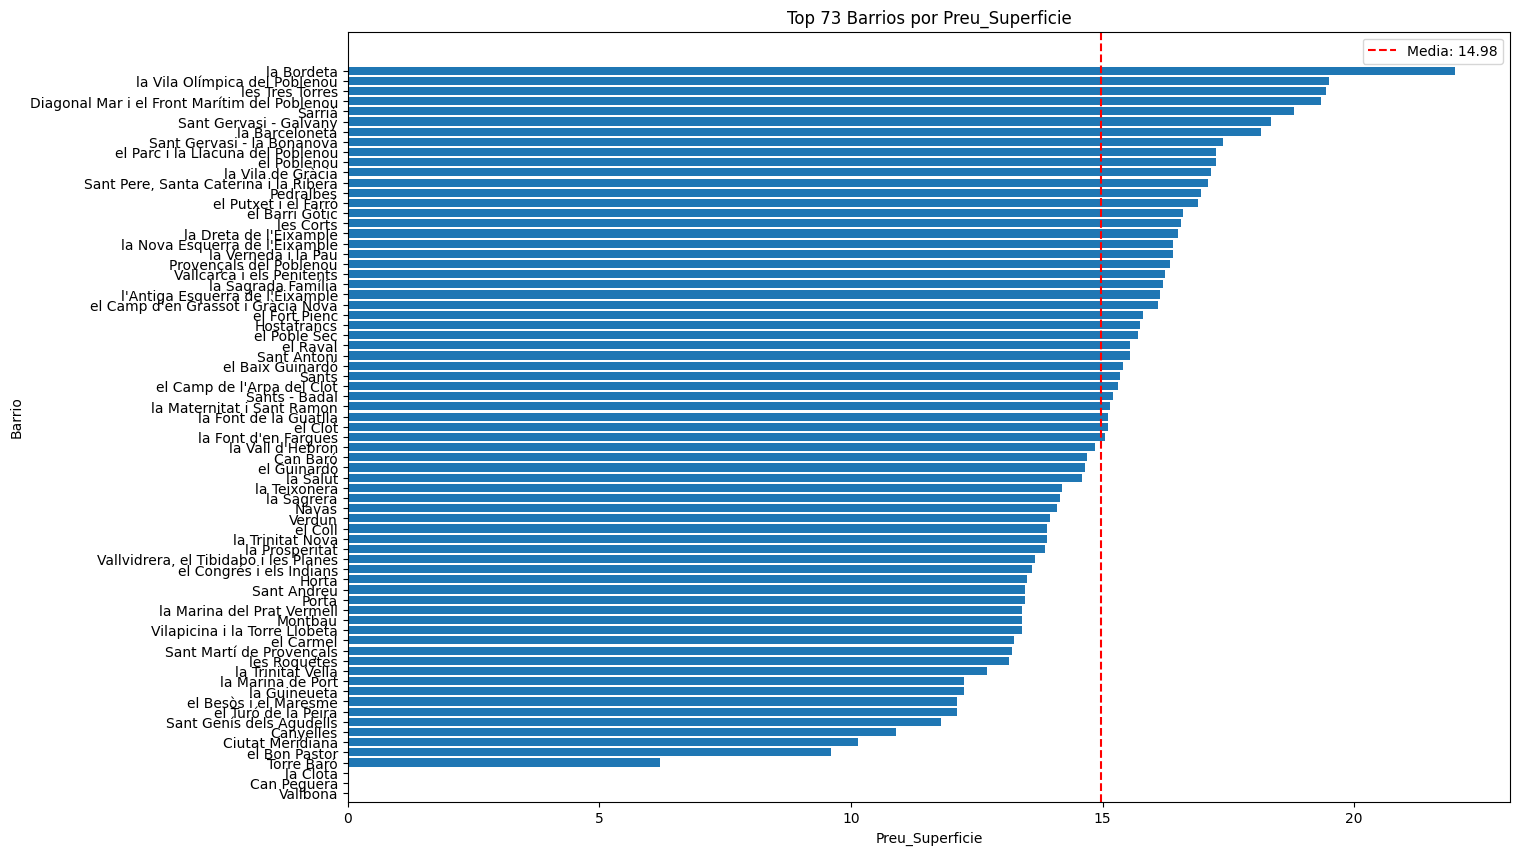

In [38]:
import matplotlib.pyplot as plt

def generar_ranking_matplotlib(df, columna, top_n=73):
    df_ordenado = df.sort_values(by=columna, ascending=False).head(top_n)
    plt.figure(figsize=(15, 10))
    plt.barh(df_ordenado['Nom_Barri'], df_ordenado[columna])
    media = df[columna].mean()
    plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    plt.gca().invert_yaxis()
    plt.title(f"Top {top_n} Barrios por {columna}")
    plt.xlabel(columna)
    plt.ylabel('Barrio')
    plt.legend()
    
  
    plt.show()


generar_ranking_matplotlib(df_final, 'Preu_Superficie')




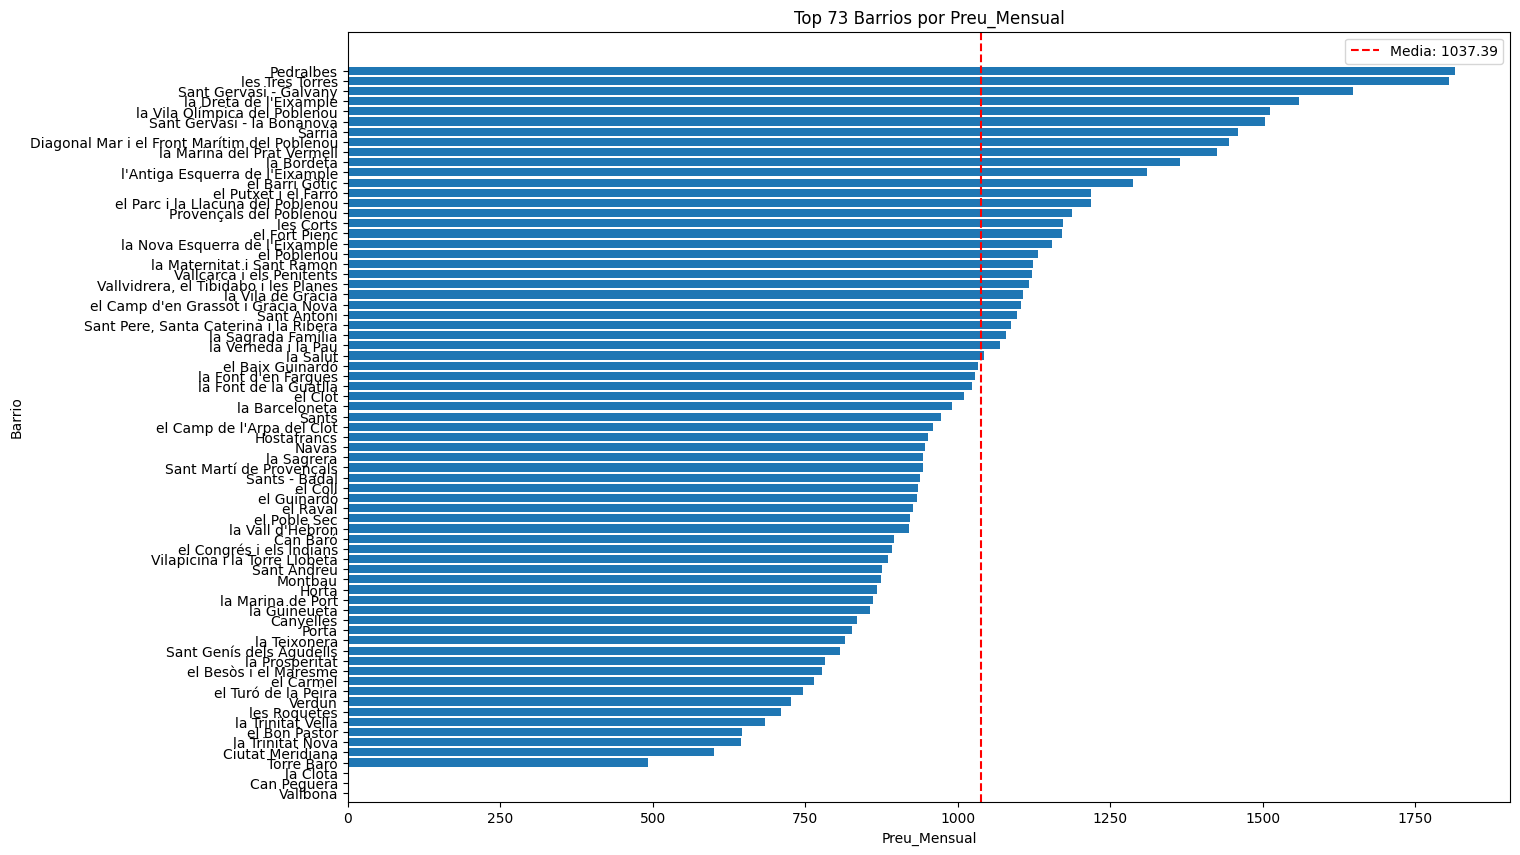

In [39]:
generar_ranking_matplotlib(df_final, 'Preu_Mensual')

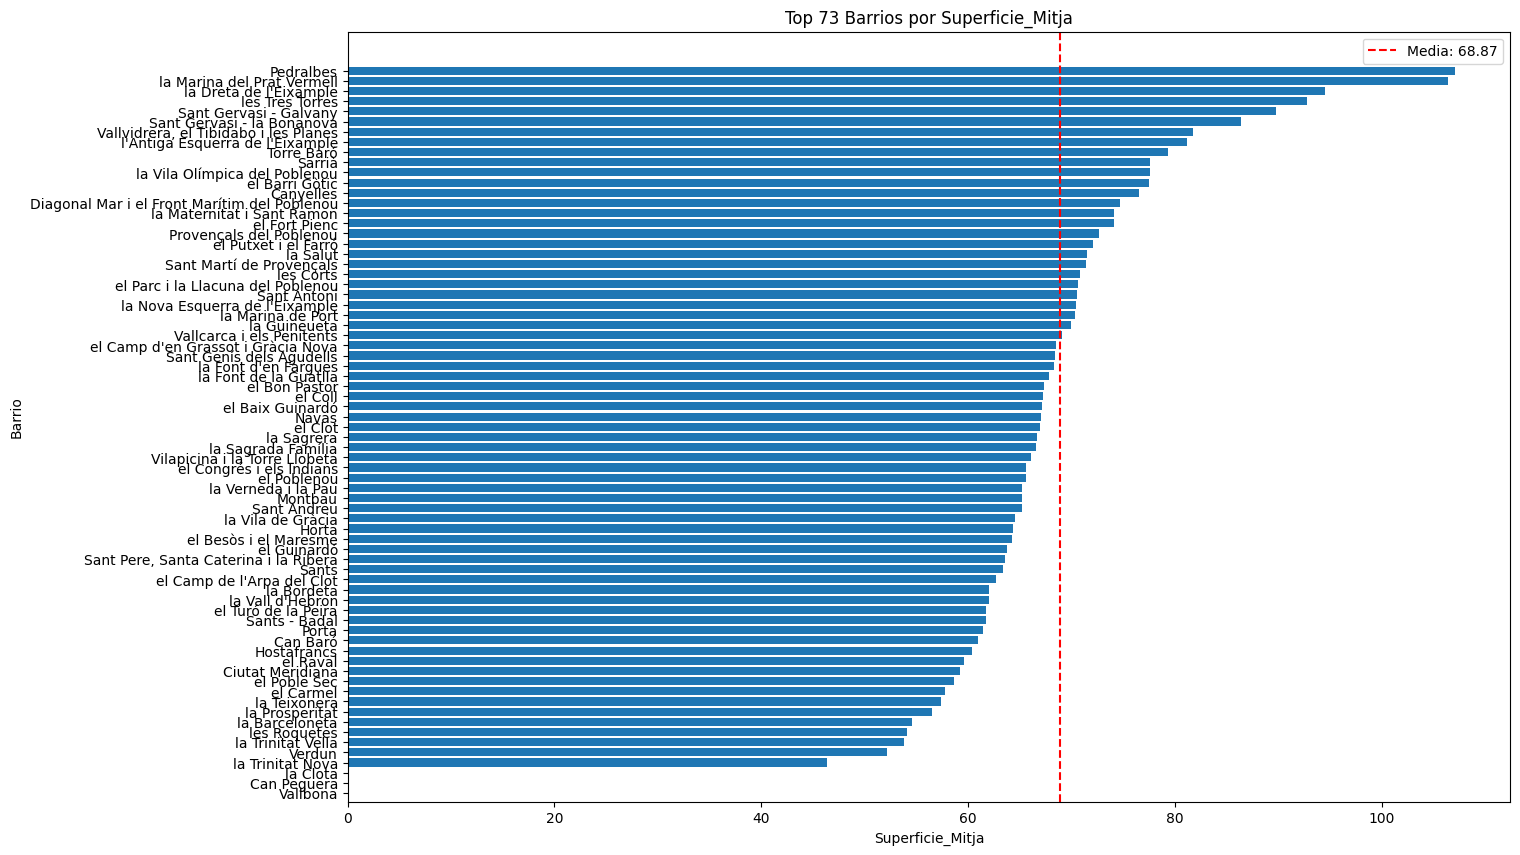

In [40]:
generar_ranking_matplotlib(df_final, 'Superficie_Mitja')

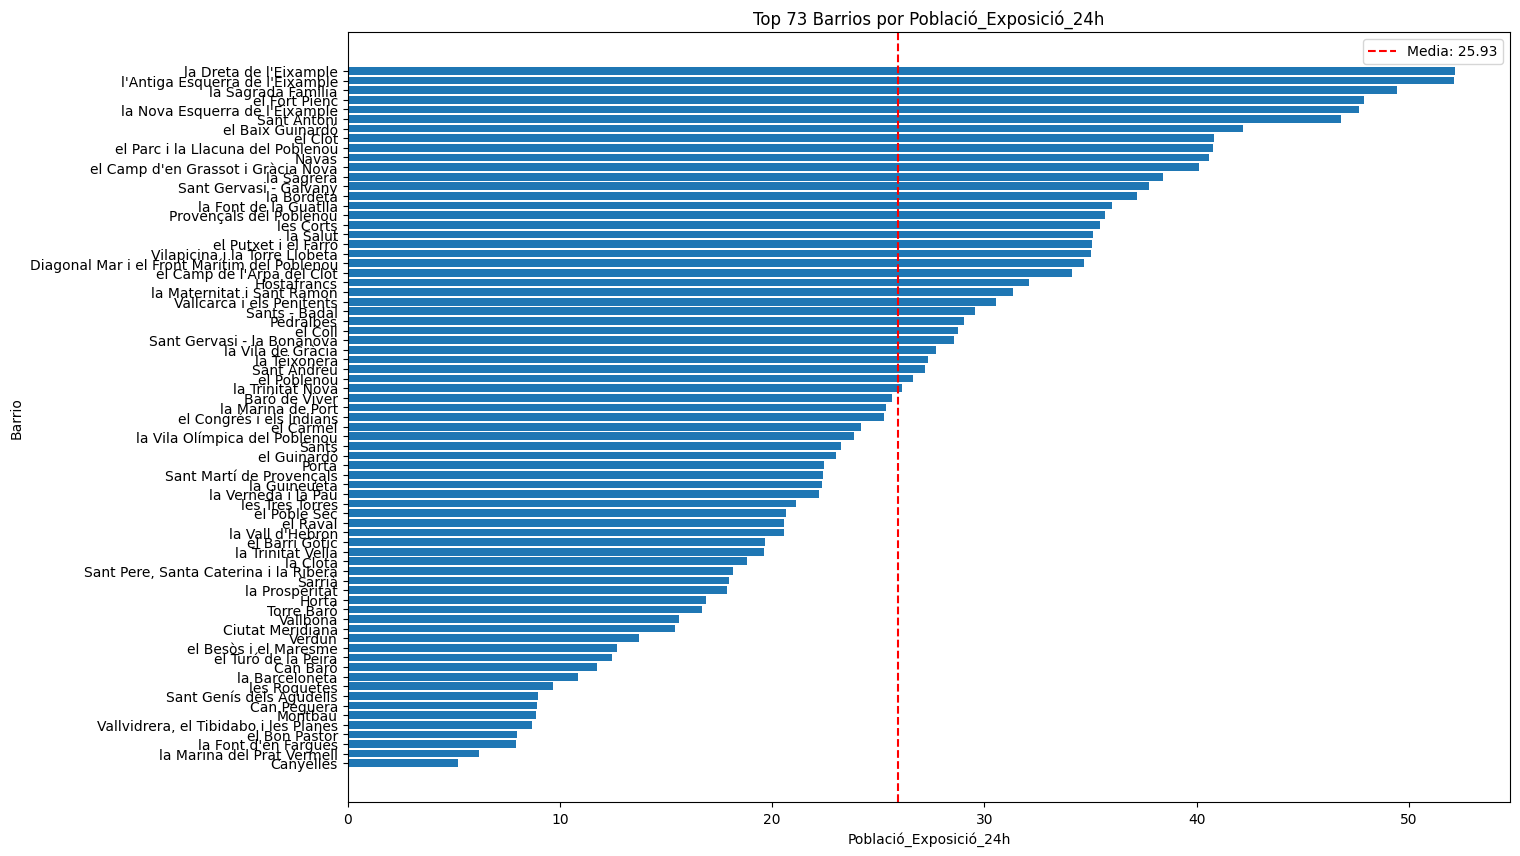

In [41]:
generar_ranking_matplotlib(df_final,'Població_Exposició_24h')

In [42]:
from sklearn.preprocessing import MinMaxScaler
def normalizar_columnas(df, columnas_a_normalizar):
    scaler = MinMaxScaler()
    df_normalizado = pd.DataFrame(scaler.fit_transform(df[columnas_a_normalizar]), columns=columnas_a_normalizar)
    return df_normalizado

In [43]:
df_final['Preu_Mensual'].fillna(0, inplace=True)
df_final['Preu_Superficie'].fillna(0, inplace=True)
df_final['Superficie_Mitja'].fillna(0, inplace=True)


c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


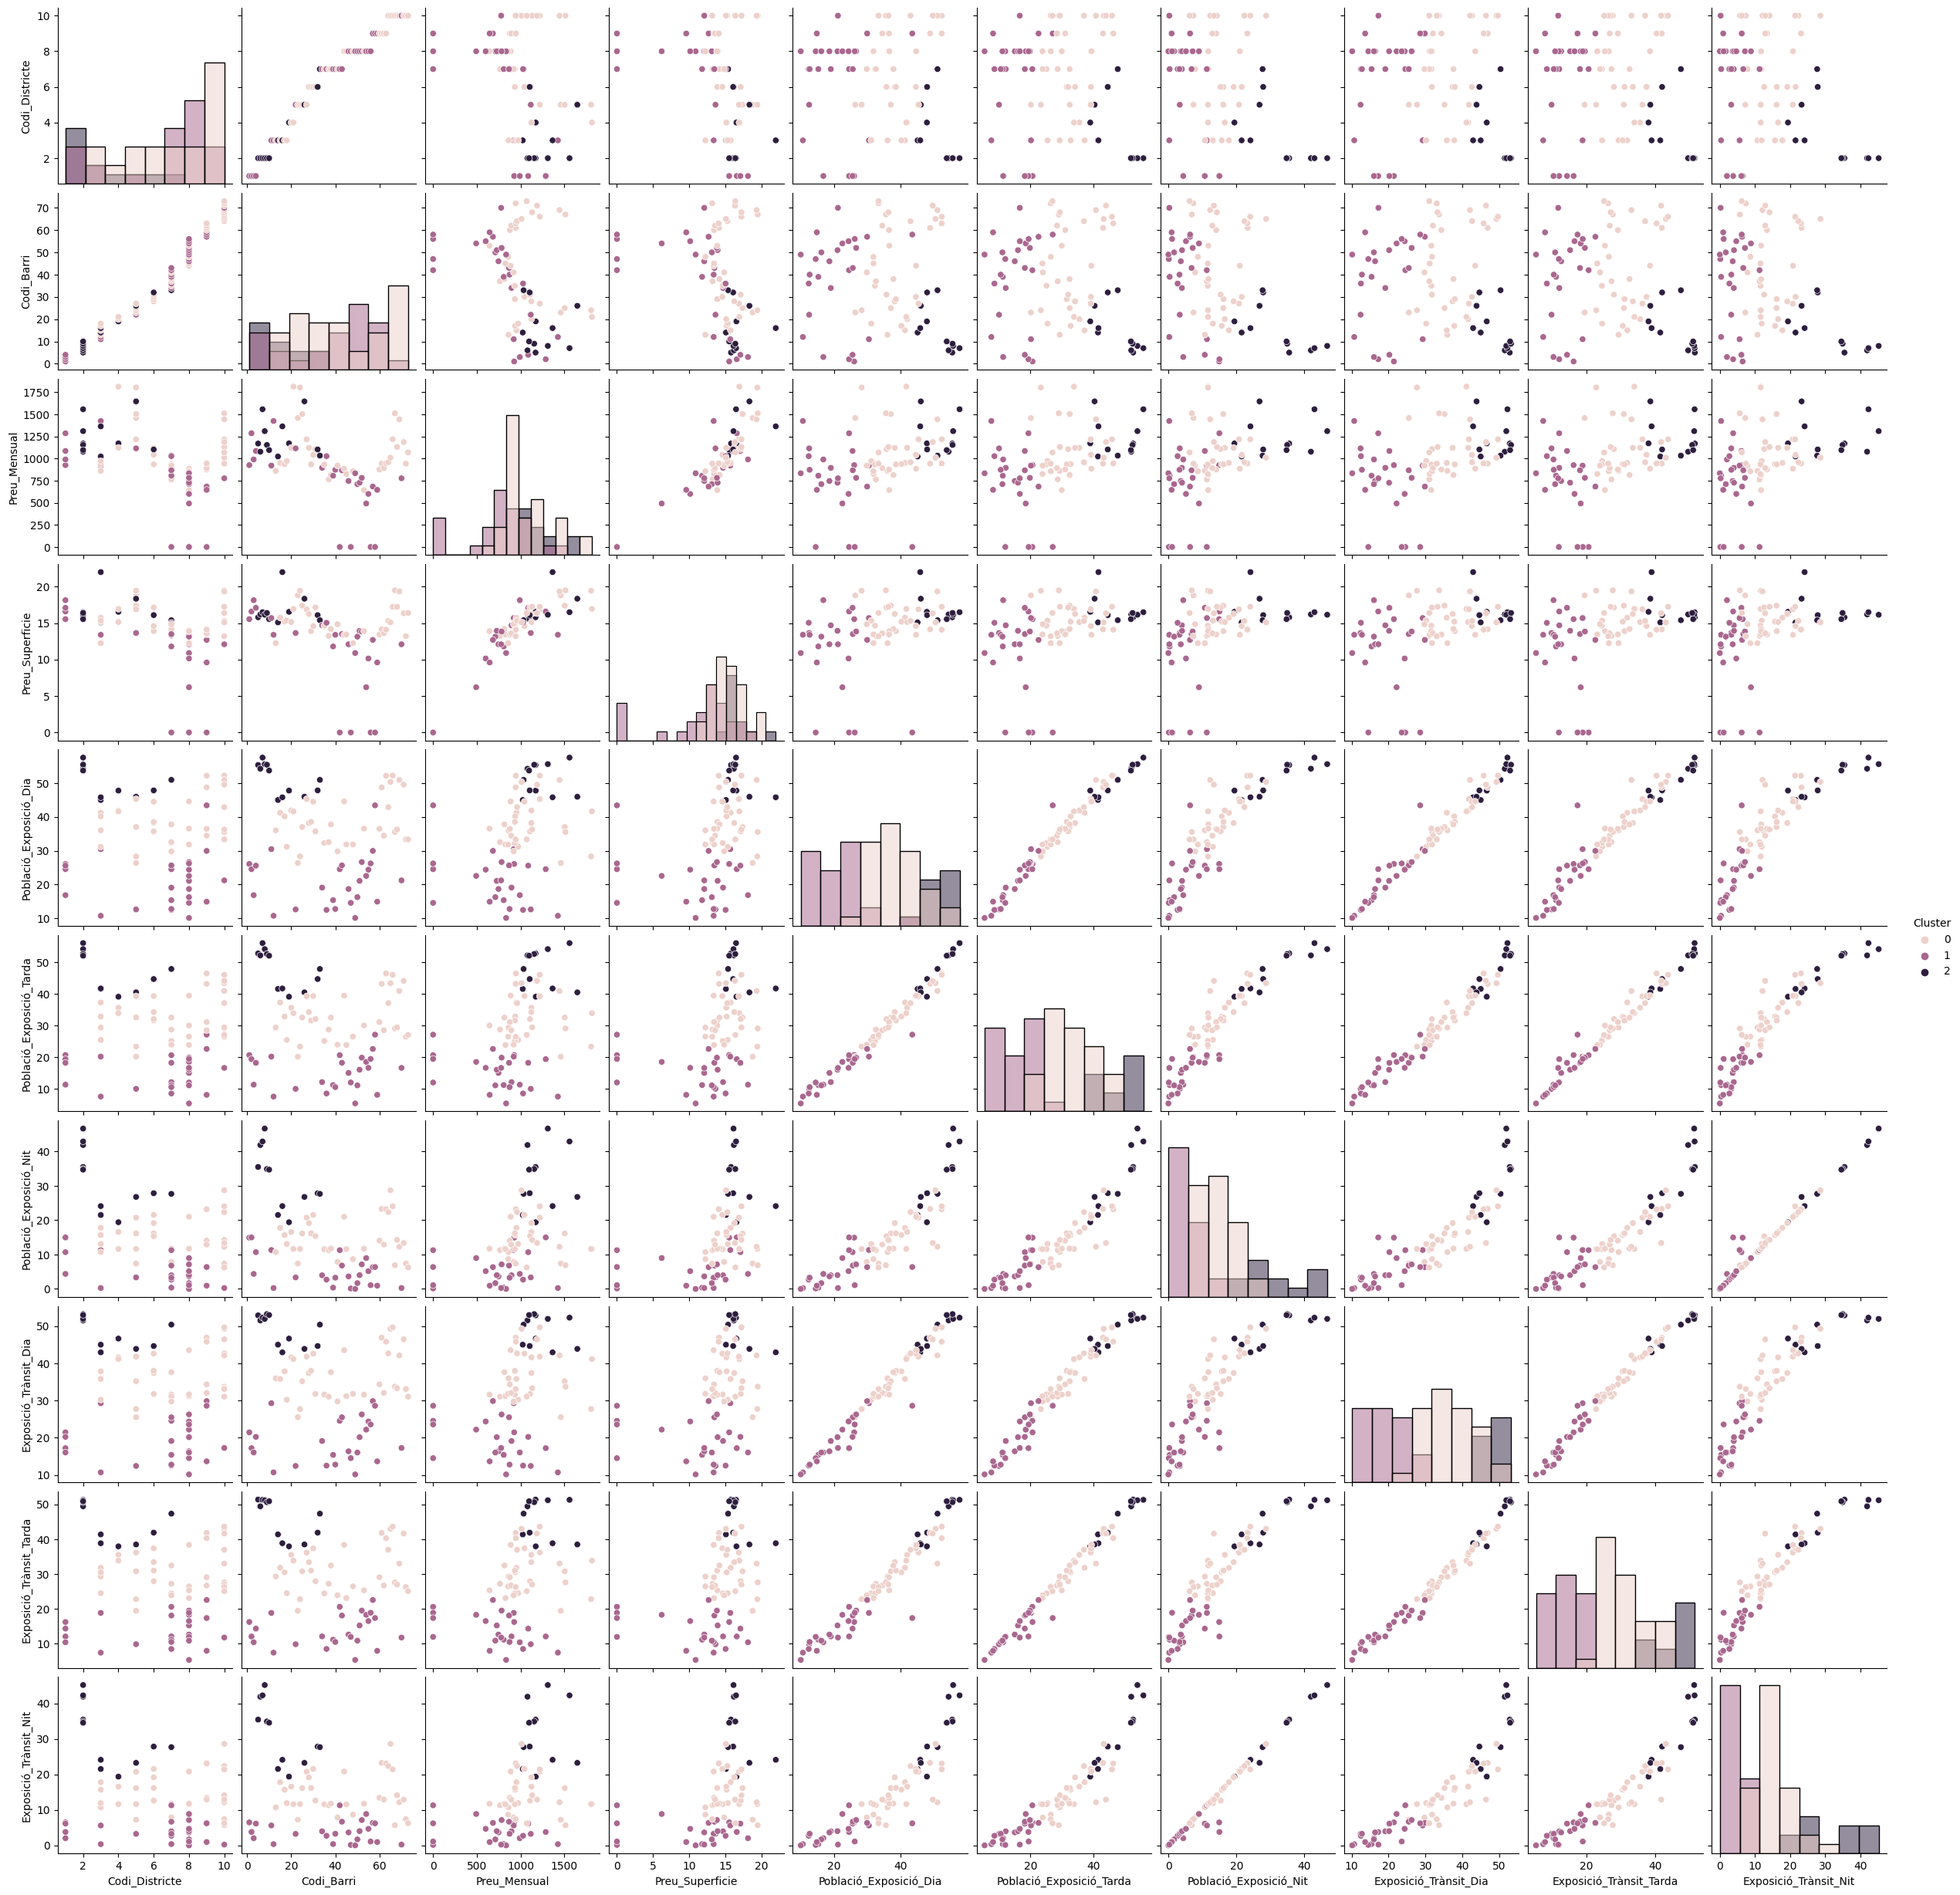

KMeans(n_clusters=3, random_state=0)

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

def realitzar_clustering(df, columnas ):
    num_clusters=3
    df_normalizado = df[columnas].copy()
    scaler = StandardScaler()
    df_normalizado = scaler.fit_transform(df_normalizado)
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(df_normalizado)
    df_resultado = df.copy()
    df_resultado['Cluster'] = kmeans.labels_
    sns.pairplot(df_resultado, hue='Cluster', diag_kind='hist', vars=columnas)
    plt.show()

    return  kmeans

columnas_clustering = ['Codi_Districte', 'Codi_Barri', 'Preu_Mensual', 'Preu_Superficie', 
                        'Població_Exposició_Dia', 'Població_Exposició_Tarda', 
                        'Població_Exposició_Nit', 'Exposició_Trànsit_Dia', 'Exposició_Trànsit_Tarda',
                        'Exposició_Trànsit_Nit']
                        
realitzar_clustering(df_final, columnas_clustering)

Anàlisi de la Matriu de Gràfics de Dispersió:

Codi_Districte i Codi_Barri: Aquestes dues variables són categòriques i representen conjunts discrets de punts en el gràfic. La seva naturalesa categòrica fa que no tinguin una relació clara amb altres variables quantitatives.

Preu_Mensual i Preu_Superficie: L'anàlisi visual revela una relació lineal positiva entre aquestes dues variables. Això indica que quan el preu mensual augmenta, el preu per superfície també ho fa. Les distribucions marginals d'aquestes variables proporcionen una visió detallada de la distribució dels lloguers en diferents barriades.

Població_Exposició_...: Les diferents hores del dia (Dia, Tarda i Nit) presenten correlacions entre elles. Es pot inferir que les àrees amb una alta exposició de població durant el dia tendeixen a tenir una exposició similar durant la tarda i la nit.

Exposició_Trànsit_...: De manera similar a l'exposició de la població, les variables relacionades amb l'exposició al trànsit mostren patrons de correlació entre les diferents hores del dia. A més, hi ha una correlació evident entre l'exposició al trànsit i l'exposició de la població.

En resum, la matriu de gràfics de dispersió proporciona una visió detallada de les interaccions i les relacions entre les diferents variables considerades en aquest estudi. Aquesta anàlisi visual és essencial per comprendre les dinàmiques de lloguer, la població i el trànsit en diferents barriades.
Basant-nos en els gràfics de dispersió proporcionats:

Quan parlem de l'exposició al soroll, podem considerar que les variables com "Exposició_Trànsit_Dia", "Exposició_Trànsit_Tarda" i "Exposició_Trànsit_Nit" són indicadors d'aquesta exposició, ja que el trànsit és una de les principals fonts de soroll en àrees urbanes.

Mirant les interaccions d'aquestes variables amb "Preu_Mensual" i "Preu_Superficie", no es veu una correlació lineal clara entre l'exposició al trànsit (soroll) i els preus del lloguer. Els punts semblen estar distribuïts de manera bastant aleatòria en els gràfics de dispersió corresponents, indicant una falta de correlació lineal.

Per tant, podries afirmar:

"Basat en l'anàlisi visual dels gràfics de dispersió, no sembla haver-hi una correlació lineal clara entre l'exposició al trànsit (com a indicador de l'exposició al soroll) i els preus del lloguer. Tot i això, seria recomanable realitzar més anàlisis estadístics, com el càlcul del coeficient de correlació, per confirmar aquesta observació."

In [45]:
columnas_a_normalizar = [ 'Preu_Mensual', 'Preu_Superficie', 
                        'Població_Exposició_Dia', 'Població_Exposició_Tarda', 
                        'Població_Exposició_Nit', 'Exposició_Trànsit_Dia', 'Exposició_Trànsit_Tarda',
                        'Exposició_Trànsit_Nit']
df_normalizado = normalizar_columnas(df_final, columnas_a_normalizar)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Preu_Mensual              73 non-null     float64
 1   Preu_Superficie           73 non-null     float64
 2   Població_Exposició_Dia    73 non-null     float64
 3   Població_Exposició_Tarda  73 non-null     float64
 4   Població_Exposició_Nit    73 non-null     float64
 5   Exposició_Trànsit_Dia     73 non-null     float64
 6   Exposició_Trànsit_Tarda   73 non-null     float64
 7   Exposició_Trànsit_Nit     73 non-null     float64
dtypes: float64(8)
memory usage: 4.7 KB


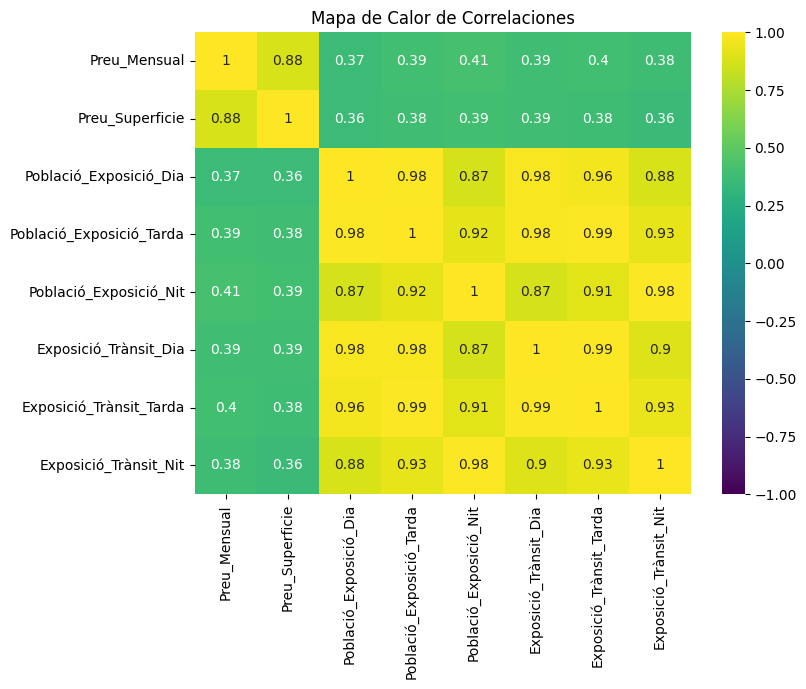

In [46]:
def mapa_calor_correlaciones_matplotlib(df, columnas):
    correlacion = df[columnas].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlacion, annot=True, cmap='viridis', vmin=-1, vmax=1)
    plt.title("Mapa de Calor de Correlaciones")
    plt.show()
    
columnas_normalizadas = [
    'Preu_Mensual', 'Preu_Superficie', 'Població_Exposició_Dia', 
    'Població_Exposició_Tarda', 'Població_Exposició_Nit', 
    'Exposició_Trànsit_Dia', 'Exposició_Trànsit_Tarda', 'Exposició_Trànsit_Nit'
]
mapa_calor_correlaciones_matplotlib(df_normalizado, columnas_normalizadas)

Aquest "Mapa de Calor de Correlacions" mostra la relació lineal entre diferents variables basada en el coeficient de correlació. Els valors varien entre -1 i 1, on:

1 indica una correlació positiva perfecta.
-1 indica una correlació negativa perfecta.
0 indica cap correlació.
Ara, anem a interpretar les correlacions:

Exposició al Trànsit: Les variables "Exposició_Trànsit_Nit", "Exposició_Trànsit_Tarda" i "Exposició_Trànsit_Dia" tenen correlacions altes entre elles (superiors a 0.87). Això indica que les zones amb alt trànsit durant el dia, també solen tenir-ne durant la tarda i la nit.

Exposició de Població: De manera similar, les variables "Població_Exposició_Nit", "Població_Exposició_Tarda" i "Població_Exposició_Dia" tenen correlacions molt altes entre elles (totes superiors a 0.87), la qual cosa suggereix que les zones amb alta exposició de població durant un moment del dia tendeixen a tenir-la en altres moments.

Correlació entre Exposició de Població i Trànsit: Existeix una correlació alta entre les variables de trànsit i població (valors entre 0.87 i 1). Això indica que en zones amb més trànsit, també hi ha més exposició de població.

Correlació amb Preus: Les correlacions entre les variables de trànsit/població i "Preu_Mensual" o "Preu_Superficie" són moderades (al voltant de 0.36 a 0.41). Tot i que hi ha alguna relació, no és tan forta com les anteriors. No obstant això, la correlació entre "Preu_Mensual" i "Preu_Superficie" és molt alta (0.88), la qual cosa indica que, generalment, on el preu mensual és alt, el preu per superfície també ho és.

Per resumir, aquest mapa ens diu que les àrees amb alt trànsit tendeixen a tenir alta exposició de població en tots els moments del dia. No obstant això, la relació entre aquestes variables i els preus del lloguer és moderada.
.